In [2041]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2042]:
leads = pd.read_csv('Leads.csv')

In [2043]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

# Data cleaning

In [2044]:
leads.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [2045]:
# There are no duplicate data entries:

len(leads[leads.duplicated()])

0

In [2046]:
# The distinct values of the non-float columns:

def nonfloat_columns(df):
    return [column for column in leads.columns if column not in leads.describe().columns]

for column in nonfloat_columns(leads):
    if leads[column].nunique() < 100:
        print(f'{column}: ', leads[column].unique())

Lead Origin:  ['API' 'Landing Page Submission' 'Lead Add Form' 'Lead Import'
 'Quick Add Form']
Lead Source:  ['Olark Chat' 'Organic Search' 'Direct Traffic' 'Google' 'Referral Sites'
 'Welingak Website' 'Reference' 'google' 'Facebook' nan 'blog'
 'Pay per Click Ads' 'bing' 'Social Media' 'WeLearn' 'Click2call'
 'Live Chat' 'welearnblog_Home' 'youtubechannel' 'testone' 'Press_Release'
 'NC_EDM']
Do Not Email:  ['No' 'Yes']
Do Not Call:  ['No' 'Yes']
Last Activity:  ['Page Visited on Website' 'Email Opened' 'Unreachable'
 'Converted to Lead' 'Olark Chat Conversation' 'Email Bounced'
 'Email Link Clicked' 'Form Submitted on Website' 'Unsubscribed'
 'Had a Phone Conversation' 'View in browser link Clicked' nan
 'Approached upfront' 'SMS Sent' 'Visited Booth in Tradeshow'
 'Resubscribed to emails' 'Email Received' 'Email Marked Spam']
Country:  [nan 'India' 'Russia' 'Kuwait' 'Oman' 'United Arab Emirates'
 'United States' 'Australia' 'United Kingdom' 'Bahrain' 'Ghana'
 'Singapore' 'Qatar' '

In [2047]:
for column in nonfloat_columns(leads):
    if (leads[column].nunique() < 100):
        print(leads[column].value_counts(), '\n')

Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64 

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64 

No     8506
Yes     734
Name: Do Not Email, dtype: int64 

No     9238
Yes       2
Name: Do Not Call, dtype: int64 

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          97

Observations
* `Lead Source`: value 'google' is duplicate of 'Google'. Should be combined into one.
* `Specialization`: contains value 'Select' which corresponds to missing value.
* `How did you hear about X Education`: contains value 'Select' which corresponds to missing value.
* `Magazine`: has only one unique value 'No'. Column should be dropped.
* `Newspaper Article`: has only one unique value 'No'. Column should be dropped.
* `X Education Forums`: has only one unique value 'No'. Column should be dropped.
* `Receive More Updates About Our Courses`: has only one unique value 'No'. Column should be dropped.
* `Update me on Supply Chain Content`: has only one unique value 'No'. Column should be dropped.
* `Get updates on DM Content`: has only one unique value 'No'. Column should be dropped.
* `Lead Profile`: contains value 'Select' which corresponds to missing value.
* `City`: contains value 'Select' which corresponds to missing value.
* `I agree to pay the amount through cheque`: has only one unique value 'No'. Column should be dropped.

In [2048]:
leads['Lead Source'] = leads['Lead Source'].replace('google', 'Google')

In [2049]:
leads = leads.drop(columns=['Magazine', 'Newspaper Article', 'X Education Forums', 'Receive More Updates About Our Courses', 'Update me on Supply Chain Content', 'Get updates on DM Content', 'I agree to pay the amount through cheque'])

In [2050]:
leads['Specialization'] = leads['Specialization'].replace('Select', np.nan)
leads['How did you hear about X Education'] = leads['How did you hear about X Education'].replace('Select', np.nan)
leads['Lead Profile'] = leads['Lead Profile'].replace('Select', np.nan)
leads['City'] = leads['City'].replace('Select', np.nan)

## Handling of missing values

In [2051]:
def fractions_of_missing_values(df):
    return df.isna().mean()

def columns_with_significantly_many_missing_values(df):
    return fractions_of_missing_values(df)[fractions_of_missing_values(df) > 0.20].sort_values()

fractions_of_missing_values(leads)

Prospect ID                                      0.000000
Lead Number                                      0.000000
Lead Origin                                      0.000000
Lead Source                                      0.003896
Do Not Email                                     0.000000
Do Not Call                                      0.000000
Converted                                        0.000000
TotalVisits                                      0.014827
Total Time Spent on Website                      0.000000
Page Views Per Visit                             0.014827
Last Activity                                    0.011147
Country                                          0.266342
Specialization                                   0.365801
How did you hear about X Education               0.784632
What is your current occupation                  0.291126
What matters most to you in choosing a course    0.293182
Search                                           0.000000
Newspaper     

In [2052]:
columns_with_significantly_many_missing_values(leads)

Country                                          0.266342
What is your current occupation                  0.291126
What matters most to you in choosing a course    0.293182
Tags                                             0.362879
Specialization                                   0.365801
City                                             0.397078
Asymmetrique Activity Index                      0.456494
Asymmetrique Profile Index                       0.456494
Asymmetrique Activity Score                      0.456494
Asymmetrique Profile Score                       0.456494
Lead Quality                                     0.515909
Lead Profile                                     0.741883
How did you hear about X Education               0.784632
dtype: float64

In [2053]:
# We drop all columns with more than 35% missing values:

leads = leads.drop(fractions_of_missing_values(leads)[fractions_of_missing_values(leads) > 0.35].index, axis=1)

In [2054]:
columns_with_significantly_many_missing_values(leads)

Country                                          0.266342
What is your current occupation                  0.291126
What matters most to you in choosing a course    0.293182
dtype: float64

In [2055]:
leads['Country'].value_counts()

India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
South Africa               4
Nigeria                    4
Germany                    4
Kuwait                     4
Canada                     4
Sweden                     3
China                      2
Asia/Pacific Region        2
Uganda                     2
Bangladesh                 2
Italy                      2
Belgium                    2
Netherlands                2
Ghana                      2
Philippines                2
Russia                     1
Switzerland                1
Vietnam                    1
Denmark                    1
Tanzania                   1
Liberia                    1
Malaysia      

In [2056]:
# Since anyway almost every entry has country 'India', it is better to drop the column 'Country' instead of trying to impute the missing values:

leads = leads.drop(['Country'], axis=1)

In [2057]:
leads['What is your current occupation'].value_counts()

Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [2058]:
# Since a large majority of data points has 'Unemployed', it is a good approximation to impute the missing values with 'Unemployed':

leads['What is your current occupation'] = leads['What is your current occupation'].replace(np.nan, 'Unemployed')

In [2059]:
leads['What matters most to you in choosing a course'].value_counts()

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [2060]:
# Since anyway almost every entry has 'Better Career Prospects', it is better to drop the column 'What matters most to you in choosing a course' instead of imputing the missing values:

leads = leads.drop(['What matters most to you in choosing a course'], axis=1)

In [2061]:
# Now we have no column with too many missing values (i.e. more than 20%):

len(columns_with_significantly_many_missing_values(leads))

0

## Handling of outliers

In [2062]:
# the column 'Converted' is binary:

leads['Converted'].unique()

array([0, 1])

In [2063]:
# Therefore we don't consider it as a numerical variable:

def float_columns(df):
    return [column for column in leads.describe().columns if column != 'Converted']

float_columns(leads)

['Lead Number',
 'TotalVisits',
 'Total Time Spent on Website',
 'Page Views Per Visit']

In [2064]:
leads[float_columns(leads)].describe(percentiles=[.25,.5,.75,.99])

,Lead Number,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9240.000000,9103.000000,9240.000000,9103.000000
mean,617188.435606,3.445238,487.698268,2.362820
std,23405.995698,4.854853,548.021466,2.161418
min,579533.000000,0.000000,0.000000,0.000000
25%,596484.500000,1.000000,12.000000,1.000000
50%,615479.000000,3.000000,248.000000,2.000000
75%,637387.250000,5.000000,936.000000,3.000000
99%,659592.980000,17.000000,1840.610000,9.000000
max,660737.000000,251.000000,2272.000000,55.000000


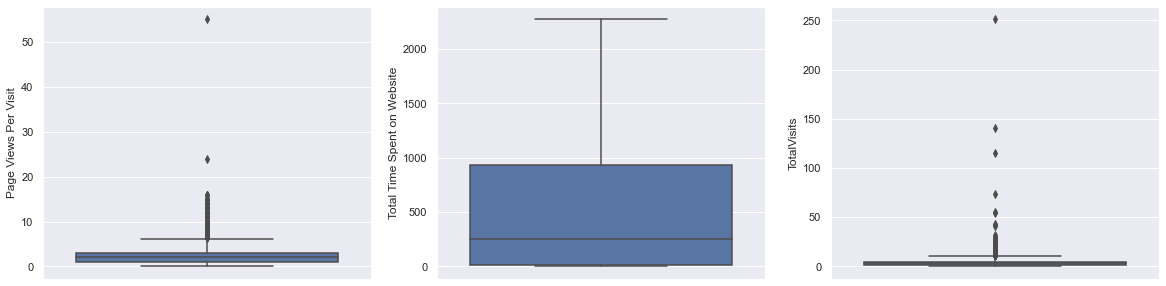

In [2065]:
# The variables 'TotalVisits' and 'Page Views Per Visit' have outliers:

plt.figure(figsize=(20, 5))
plt.subplot(1,3,1)
sns.boxplot(y = 'Page Views Per Visit', data = leads)
plt.subplot(1,3,2)
sns.boxplot(y = 'Total Time Spent on Website', data = leads)
plt.subplot(1,3,3)
sns.boxplot(y = 'TotalVisits', data = leads)
plt.show()

In [2066]:
# We drop entries where values are above the 99% percentile:

outlier_threshold = leads['TotalVisits'].quantile(0.99)
leads = leads[leads['TotalVisits'] < outlier_threshold]

outlier_threshold = leads['Page Views Per Visit'].quantile(0.99)
leads = leads[leads['Page Views Per Visit'] < outlier_threshold]

leads.describe(percentiles=[.25,.5,.75,.99])

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,8892.000000,8892.000000,8892.000000,8892.000000,8892.000000
mean,617059.278677,0.379780,3.088507,476.563878,2.229871
std,23301.503938,0.485359,2.822722,544.325819,1.837171
min,579533.000000,0.000000,0.000000,0.000000,0.000000
25%,596446.750000,0.000000,1.000000,3.750000,1.000000
50%,615467.000000,0.000000,3.000000,239.000000,2.000000
75%,637131.750000,1.000000,4.000000,908.250000,3.000000
99%,659555.630000,1.000000,13.000000,1837.180000,7.000000
max,660737.000000,1.000000,16.000000,2272.000000,8.000000


# Exploratory data analysis

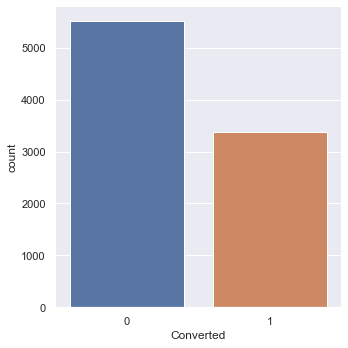

In [2067]:
sns.catplot(data=leads, x="Converted", kind="count");

Let us go through the categorical variables and see how the conversions are distributed with respect to them.

In [2068]:
nonfloat_columns(leads)

['Prospect ID',
 'Lead Origin',
 'Lead Source',
 'Do Not Email',
 'Do Not Call',
 'Last Activity',
 'What is your current occupation',
 'Search',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'A free copy of Mastering The Interview',
 'Last Notable Activity']

We see from the following plot that the most conversions come from `Landing Page Submissions`:

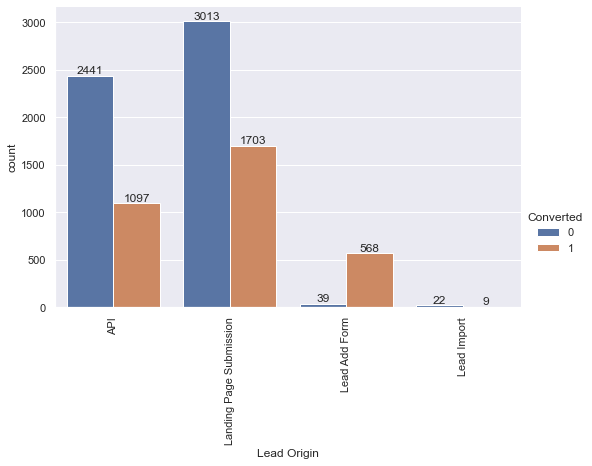

In [2069]:
g = sns.catplot(data=leads, x="Lead Origin", hue="Converted", kind="count", aspect=1.5)
g.set_xticklabels(rotation=90)
ax = g.facet_axis(0, 0)

for i in ax.containers:
    ax.bar_label(i)

The following plot shows that most conversions come from `Google`. `Organic Search` also has a relatively good conversion rate.

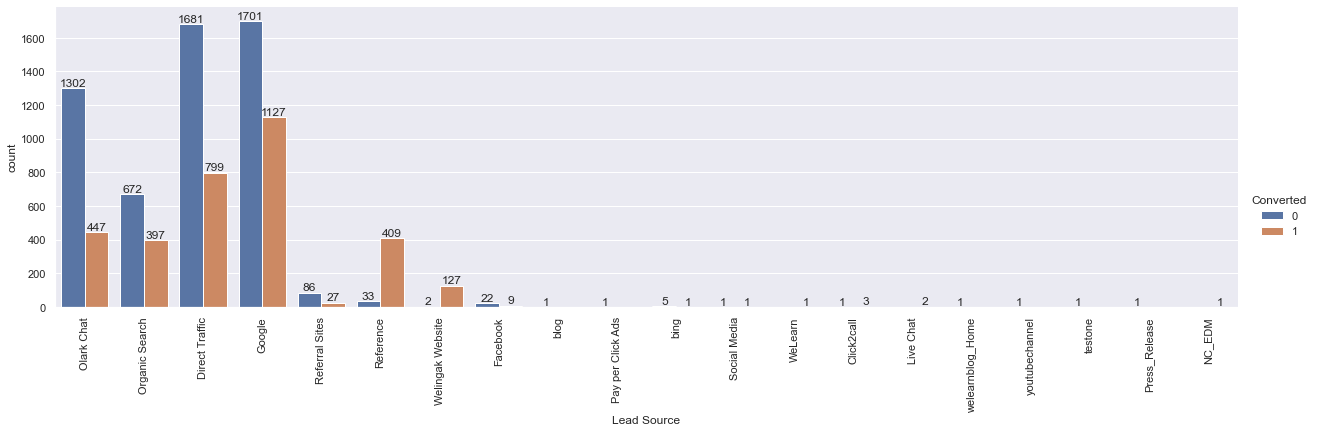

In [2070]:
g = sns.catplot(data=leads, x="Lead Source", hue="Converted", kind="count", aspect=3.5)
g.set_xticklabels(rotation=90)
ax = g.facet_axis(0, 0)

for i in ax.containers:
    ax.bar_label(i)

The following plot shows that those receiving emails had a much higher conversion rate.

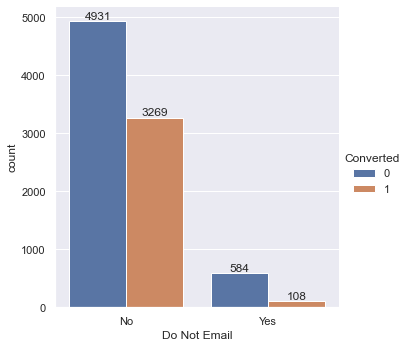

In [2071]:
g = sns.catplot(data=leads, x="Do Not Email", hue="Converted", kind="count")
ax = g.facet_axis(0, 0)

for i in ax.containers:
    ax.bar_label(i)

The following plot shows that `SMS Sent` as the last activity has the most conversions and a really conversion rate.

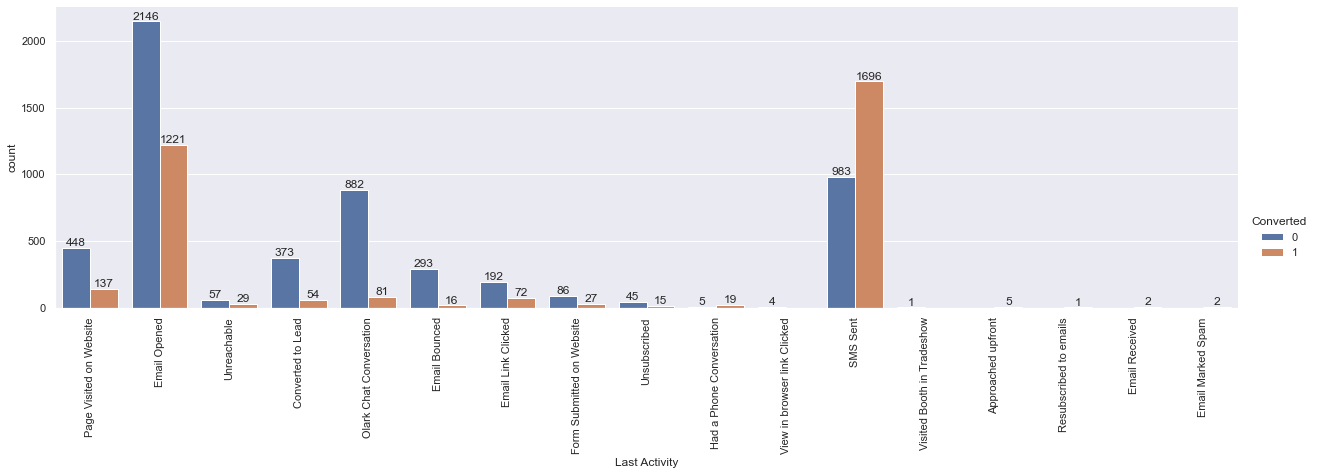

In [2072]:
g = sns.catplot(data=leads, x="Last Activity", hue="Converted", kind="count", aspect=3.5)
g.set_xticklabels(rotation=90)
ax = g.facet_axis(0, 0)

for i in ax.containers:
    ax.bar_label(i)

In the following plot we see that working professionals have the highest conversion rate (except for housewives who appear in too small numbers), while in absolute numbers the most conversions happened for unemployed.

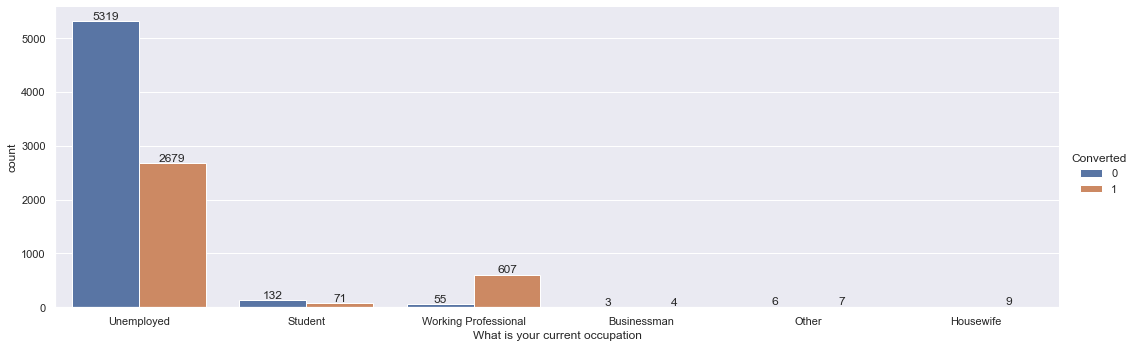

In [2073]:
g = sns.catplot(data=leads, x="What is your current occupation", hue="Converted", kind="count", aspect=3)
ax = g.facet_axis(0, 0)

for i in ax.containers:
    ax.bar_label(i)

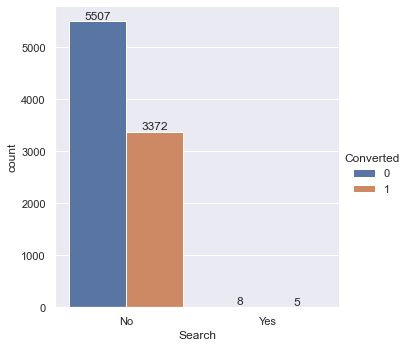

In [2074]:
g = sns.catplot(data=leads, x="Search", hue="Converted", kind="count")
ax = g.facet_axis(0, 0)

for i in ax.containers:
    ax.bar_label(i)

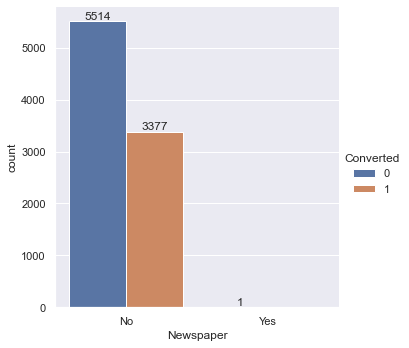

In [2075]:
g = sns.catplot(data=leads, x="Newspaper", hue="Converted", kind="count")
ax = g.facet_axis(0, 0)

for i in ax.containers:
    ax.bar_label(i)

In [2076]:
leads = leads.drop(columns=['Newspaper'])

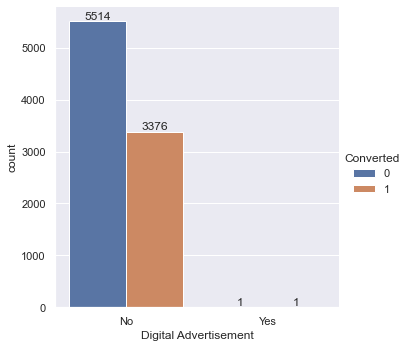

In [2077]:
g = sns.catplot(data=leads, x="Digital Advertisement", hue="Converted", kind="count")
ax = g.facet_axis(0, 0)

for i in ax.containers:
    ax.bar_label(i)

In [2078]:
leads = leads.drop(columns=['Digital Advertisement'])

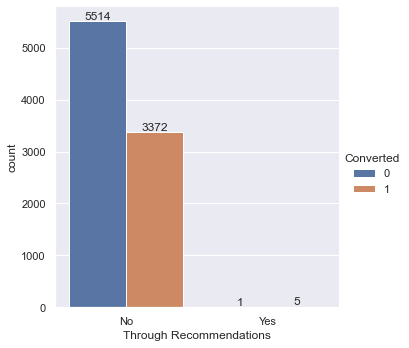

In [2079]:
g = sns.catplot(data=leads, x="Through Recommendations", hue="Converted", kind="count")
ax = g.facet_axis(0, 0)

for i in ax.containers:
    ax.bar_label(i)

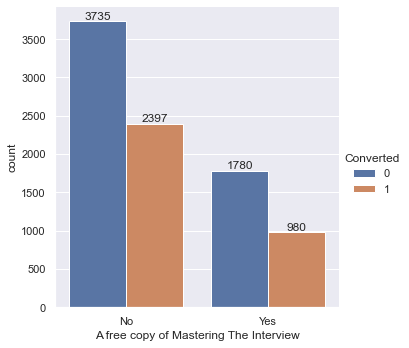

In [2080]:
g = sns.catplot(data=leads, x="A free copy of Mastering The Interview", hue="Converted", kind="count")
ax = g.facet_axis(0, 0)

for i in ax.containers:
    ax.bar_label(i)

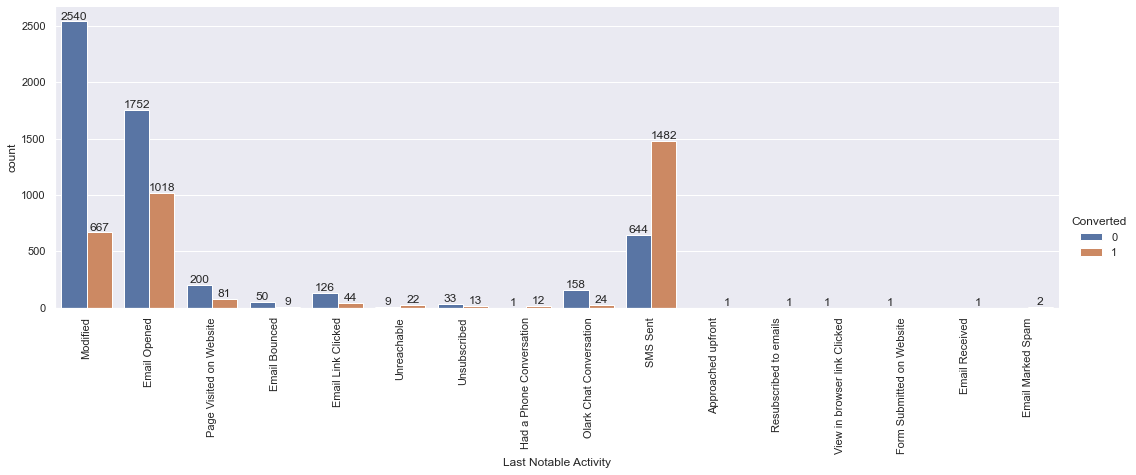

In [2081]:
g = sns.catplot(data=leads, x="Last Notable Activity", hue="Converted", kind="count", aspect=3)
g.set_xticklabels(rotation=90)
ax = g.facet_axis(0, 0)

for i in ax.containers:
    ax.bar_label(i)

Next, we examine the relation between Conversions and the numerical variables.

In [2082]:
numerical_variables = [col for col in float_columns(leads) if col != 'Lead Number']
numerical_variables

['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']

We see that the total time spent on website and total visits have a positive effect on conversions:

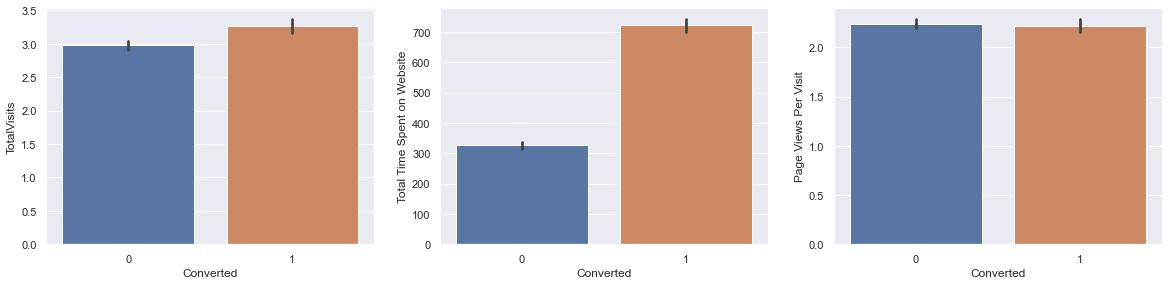

In [2083]:
plt.figure(figsize=(20,20))
plt.subplot(4,3,1)
sns.barplot(data=leads, y='TotalVisits', x='Converted')
plt.subplot(4,3,2)
sns.barplot(data=leads, y='Total Time Spent on Website', x='Converted')
plt.subplot(4,3,3)
sns.barplot(data=leads, y='Page Views Per Visit', x='Converted')
plt.show()

# Building a predictive model

## Data preparation

To prepare the data for the model, we need to convert the categorical variables:


In [2084]:
nonfloat_columns(leads)

['Prospect ID',
 'Lead Origin',
 'Lead Source',
 'Do Not Email',
 'Do Not Call',
 'Last Activity',
 'What is your current occupation',
 'Search',
 'Through Recommendations',
 'A free copy of Mastering The Interview',
 'Last Notable Activity']

In [2085]:
binary_columns = ['Do Not Email',
 'Do Not Call', 'A free copy of Mastering The Interview',  'Search',
 'Through Recommendations']

leads[binary_columns] = leads[binary_columns].apply(lambda x: x.map({'Yes': 1, 'No': 0}))

We perform one-hot-encoding on the remaining categorical variables:

In [2086]:
categorical_variables = [col for col in nonfloat_columns(leads) if col not in binary_columns and col != 'Prospect ID']
categorical_variables

['Lead Origin',
 'Lead Source',
 'Last Activity',
 'What is your current occupation',
 'Last Notable Activity']

In [2087]:
for col in categorical_variables:
    leads = pd.concat([leads, pd.get_dummies(leads[col], prefix=col, drop_first=True)], axis=1)

leads = leads.drop(columns=categorical_variables)

leads = leads.drop(columns=['Prospect ID'])

## Training the model

In [2088]:
from sklearn.model_selection import train_test_split

X = leads.drop(columns=['Converted', 'Lead Number'])
y = leads['Converted']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=42)

In [2089]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train[numerical_variables] = scaler.fit_transform(X_train[numerical_variables])

In [2090]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

rfe = RFE(LogisticRegression())            
rfe = rfe.fit(X_train, y_train)

list(zip(X_train.columns, rfe.support_))

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

[('Do Not Email', True),
 ('Do Not Call', False),
 ('TotalVisits', True),
 ('Total Time Spent on Website', True),
 ('Page Views Per Visit', True),
 ('Search', False),
 ('Through Recommendations', True),
 ('A free copy of Mastering The Interview', False),
 ('Lead Origin_Landing Page Submission', False),
 ('Lead Origin_Lead Add Form', True),
 ('Lead Origin_Lead Import', False),
 ('Lead Source_Direct Traffic', True),
 ('Lead Source_Facebook', False),
 ('Lead Source_Google', True),
 ('Lead Source_Live Chat', False),
 ('Lead Source_NC_EDM', False),
 ('Lead Source_Olark Chat', True),
 ('Lead Source_Organic Search', True),
 ('Lead Source_Pay per Click Ads', False),
 ('Lead Source_Press_Release', False),
 ('Lead Source_Reference', False),
 ('Lead Source_Referral Sites', True),
 ('Lead Source_Social Media', True),
 ('Lead Source_WeLearn', False),
 ('Lead Source_Welingak Website', True),
 ('Lead Source_bing', False),
 ('Lead Source_blog', False),
 ('Lead Source_testone', False),
 ('Lead Source_w

In [2091]:
X_train = X_train[X_train.columns[rfe.support_]]

In [2092]:
import statsmodels.api as sm

# Logistic regression model
model = sm.GLM(y_train, X_train, family = sm.families.Binomial())
model.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 7113
Model:                            GLM   Df Residuals:                     7080
Model Family:                Binomial   Df Model:                           32
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2931.9
Date:                Tue, 23 Jul 2024   Deviance:                       5863.9
Time:                        21:46:31   Pearson chi2:                 7.29e+03
No. Iterations:                    22                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
Do Not Email                                            -1.2245      0.193     -6.332      0.000      -1.604      -0.845
TotalVisits                                              1.8523      0.278      6.655      0.000       1.307       2.398
Total Time Spent on Website                              4.5972      0.159     28.940      0.000       4.286       4.908
Page Views Per Visit                                    -0.9511      0.233     -4.073      0.000      -1.409      -0.493
Through Recommendations                                 21.5378   3.13e+04      0.001      0.999   -6.14e+04    6.15e+04
Lead Origin_Lead Add Form                                3.3664      0.411      8.191      0.000       2.561       4.172
Lead Source_Direct Traffic                              -0.7540      0.377     -2.000      0.046      -1.493      -0.015
Lead Source_Google                                      -0.4063      0.377     -1.078      0.281      -1.145       0.332
Lead Source_Olark Chat                                   0.7980      0.374      2.134      0.033       0.065       1.531
Lead Source_Organic Search                              -0.5410      0.388     -1.394      0.163      -1.302       0.220
Lead Source_Referral Sites                              -0.4985      0.477     -1.046      0.296      -1.433       0.436
Lead Source_Social Media                                25.2119   7.95e+04      0.000      1.000   -1.56e+05    1.56e+05
Lead Source_Welingak Website                             2.1777      0.747      2.917      0.004       0.714       3.641
Last Activity_Converted to Lead                         -0.7759      0.202     -3.846      0.000      -1.171      -0.380
Last Activity_Email Bounced                             -1.1971      0.375     -3.196      0.001      -1.931      -0.463
Last Activity_Form Submitted on Website                 -0.7310      0.310     -2.354      0.019      -1.340      -0.122
Last Activity_Had a Phone Conversation                   1.0233      0.949      1.078      0.281      -0.837       2.883
Last Activity_Olark Chat Conversation                   -1.5824      0.187     -8.450      0.000      -1.949      -1.215
Last Activity_Page Visited on Website                   -0.5645      0.210     -2.685      0.007      -0.976      -0.152
Last Activity_Resubscribed to emails                    23.4244   7.95e+04      0.000      1.000   -1.56e+05    1.56e+05
Last Activity_View in browser link Clicked             -23.5287   5.59e+04     -0.000      1.000    -1.1e+05     1.1e+05
What is your current occupation_Housewife               23.2385   2.58e+04      0.001      0.999   -5.06e+04    5.07e+04
What is your current occupation_Student                 -0

In [2093]:
# Dropping the variable with the highest p-value and re-training the model:

X_train = X_train.drop(columns=['Through Recommendations'])

model = sm.GLM(y_train, X_train, family = sm.families.Binomial())
model.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 7113
Model:                            GLM   Df Residuals:                     7081
Model Family:                Binomial   Df Model:                           31
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2932.6
Date:                Tue, 23 Jul 2024   Deviance:                       5865.2
Time:                        21:46:32   Pearson chi2:                 7.30e+03
No. Iterations:                    22                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
Do Not Email                                            -1.2251      0.193     -6.334      0.000      -1.604      -0.846
TotalVisits                                              1.8543      0.278      6.664      0.000       1.309       2.400
Total Time Spent on Website                              4.6002      0.159     28.963      0.000       4.289       4.911
Page Views Per Visit                                    -0.9420      0.233     -4.042      0.000      -1.399      -0.485
Lead Origin_Lead Add Form                                3.3675      0.411      8.194      0.000       2.562       4.173
Lead Source_Direct Traffic                              -0.7572      0.377     -2.008      0.045      -1.496      -0.018
Lead Source_Google                                      -0.4090      0.377     -1.085      0.278      -1.148       0.330
Lead Source_Olark Chat                                   0.7990      0.374      2.137      0.033       0.066       1.532
Lead Source_Organic Search                              -0.5457      0.388     -1.406      0.160      -1.306       0.215
Lead Source_Referral Sites                              -0.5026      0.477     -1.055      0.292      -1.437       0.431
Lead Source_Social Media                                25.2095   7.95e+04      0.000      1.000   -1.56e+05    1.56e+05
Lead Source_Welingak Website                             2.1779      0.747      2.917      0.004       0.715       3.641
Last Activity_Converted to Lead                         -0.7745      0.202     -3.838      0.000      -1.170      -0.379
Last Activity_Email Bounced                             -1.1963      0.375     -3.193      0.001      -1.931      -0.462
Last Activity_Form Submitted on Website                 -0.7313      0.311     -2.355      0.019      -1.340      -0.123
Last Activity_Had a Phone Conversation                   1.0248      0.949      1.079      0.280      -0.836       2.886
Last Activity_Olark Chat Conversation                   -1.5820      0.187     -8.447      0.000      -1.949      -1.215
Last Activity_Page Visited on Website                   -0.5653      0.210     -2.689      0.007      -0.977      -0.153
Last Activity_Resubscribed to emails                    23.4241   7.95e+04      0.000      1.000   -1.56e+05    1.56e+05
Last Activity_View in browser link Clicked             -23.5298   5.59e+04     -0.000      1.000    -1.1e+05     1.1e+05
What is your current occupation_Housewife               23.2394   2.58e+04      0.001      0.999   -5.06e+04    5.07e+04
What is your current occupation_Student                 -0.3103      0.451     -0.688      0.491      -1.194       0.573
What is your current occupation_Unemployed              -0

In [2094]:
# Dropping the variable with the highest p-value and re-training the model:

X_train = X_train.drop(columns=['What is your current occupation_Housewife'])

model = sm.GLM(y_train, X_train, family = sm.families.Binomial())
model.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 7113
Model:                            GLM   Df Residuals:                     7082
Model Family:                Binomial   Df Model:                           30
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2935.6
Date:                Tue, 23 Jul 2024   Deviance:                       5871.3
Time:                        21:46:32   Pearson chi2:                 7.30e+03
No. Iterations:                    22                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
Do Not Email                                            -1.2045      0.193     -6.250      0.000      -1.582      -0.827
TotalVisits                                              1.8515      0.278      6.657      0.000       1.306       2.397
Total Time Spent on Website                              4.5973      0.159     28.971      0.000       4.286       4.908
Page Views Per Visit                                    -0.9446      0.233     -4.055      0.000      -1.401      -0.488
Lead Origin_Lead Add Form                                3.5379      0.411      8.607      0.000       2.732       4.344
Lead Source_Direct Traffic                              -0.5938      0.379     -1.566      0.117      -1.337       0.149
Lead Source_Google                                      -0.2429      0.379     -0.641      0.521      -0.985       0.500
Lead Source_Olark Chat                                   0.9609      0.376      2.557      0.011       0.224       1.697
Lead Source_Organic Search                              -0.3736      0.390     -0.959      0.338      -1.137       0.390
Lead Source_Referral Sites                              -0.3341      0.478     -0.699      0.484      -1.270       0.602
Lead Source_Social Media                                25.3754   7.95e+04      0.000      1.000   -1.56e+05    1.56e+05
Lead Source_Welingak Website                             2.1694      0.747      2.906      0.004       0.706       3.633
Last Activity_Converted to Lead                         -0.7750      0.202     -3.841      0.000      -1.170      -0.380
Last Activity_Email Bounced                             -1.1626      0.372     -3.123      0.002      -1.892      -0.433
Last Activity_Form Submitted on Website                 -0.7354      0.311     -2.368      0.018      -1.344      -0.127
Last Activity_Had a Phone Conversation                   1.0173      0.949      1.072      0.284      -0.842       2.876
Last Activity_Olark Chat Conversation                   -1.5832      0.187     -8.454      0.000      -1.950      -1.216
Last Activity_Page Visited on Website                   -0.5733      0.210     -2.726      0.006      -0.986      -0.161
Last Activity_Resubscribed to emails                    23.5571   7.95e+04      0.000      1.000   -1.56e+05    1.56e+05
Last Activity_View in browser link Clicked             -23.4749   5.58e+04     -0.000      1.000   -1.09e+05    1.09e+05
What is your current occupation_Student                 -0.6054      0.431     -1.403      0.161      -1.451       0.240
What is your current occupation_Unemployed              -0.9519      0.380     -2.505      0.012      -1.697      -0.207
What is your current occupation_Working Professional     1

In [2095]:
# Dropping the variable with the highest p-value and re-training the model:

X_train = X_train.drop(columns=['Lead Source_Social Media'])

model = sm.GLM(y_train, X_train, family = sm.families.Binomial())
model.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 7113
Model:                            GLM   Df Residuals:                     7083
Model Family:                Binomial   Df Model:                           29
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2937.5
Date:                Tue, 23 Jul 2024   Deviance:                       5875.1
Time:                        21:46:32   Pearson chi2:                 7.29e+03
No. Iterations:                    22                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
Do Not Email                                            -1.1981      0.192     -6.225      0.000      -1.575      -0.821
TotalVisits                                              1.8525      0.278      6.659      0.000       1.307       2.398
Total Time Spent on Website                              4.6046      0.159     29.015      0.000       4.294       4.916
Page Views Per Visit                                    -0.9396      0.233     -4.034      0.000      -1.396      -0.483
Lead Origin_Lead Add Form                                3.4292      0.402      8.525      0.000       2.641       4.218
Lead Source_Direct Traffic                              -0.7090      0.369     -1.919      0.055      -1.433       0.015
Lead Source_Google                                      -0.3586      0.369     -0.972      0.331      -1.082       0.365
Lead Source_Olark Chat                                   0.8464      0.366      2.312      0.021       0.129       1.564
Lead Source_Organic Search                              -0.4897      0.380     -1.288      0.198      -1.235       0.255
Lead Source_Referral Sites                              -0.4502      0.470     -0.958      0.338      -1.371       0.471
Lead Source_Welingak Website                             2.1672      0.747      2.903      0.004       0.704       3.631
Last Activity_Converted to Lead                         -0.7742      0.202     -3.837      0.000      -1.170      -0.379
Last Activity_Email Bounced                             -1.1500      0.371     -3.096      0.002      -1.878      -0.422
Last Activity_Form Submitted on Website                 -0.7330      0.311     -2.359      0.018      -1.342      -0.124
Last Activity_Had a Phone Conversation                   1.0180      0.949      1.073      0.283      -0.842       2.878
Last Activity_Olark Chat Conversation                   -1.5578      0.186     -8.385      0.000      -1.922      -1.194
Last Activity_Page Visited on Website                   -0.5726      0.210     -2.723      0.006      -0.985      -0.160
Last Activity_Resubscribed to emails                    23.6053   7.95e+04      0.000      1.000   -1.56e+05    1.56e+05
Last Activity_View in browser link Clicked             -23.4536   5.57e+04     -0.000      1.000   -1.09e+05    1.09e+05
What is your current occupation_Student                 -0.5412      0.428     -1.264      0.206      -1.380       0.298
What is your current occupation_Unemployed              -0.8856      0.376     -2.356      0.018      -1.622      -0.149
What is your current occupation_Working Professional     1.8581      0.412      4.506      0.000       1.050       2.666
Last Notable Activity_Email Link Clicked                -1

In [2096]:
# Dropping the variable with the highest p-value and re-training the model:

X_train = X_train.drop(columns=['Last Activity_Resubscribed to emails'])

model = sm.GLM(y_train, X_train, family = sm.families.Binomial())
model.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 7113
Model:                            GLM   Df Residuals:                     7084
Model Family:                Binomial   Df Model:                           28
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2938.2
Date:                Tue, 23 Jul 2024   Deviance:                       5876.5
Time:                        21:46:33   Pearson chi2:                 7.30e+03
No. Iterations:                    22                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
Do Not Email                                            -1.2074      0.192     -6.273      0.000      -1.585      -0.830
TotalVisits                                              1.8519      0.278      6.657      0.000       1.307       2.397
Total Time Spent on Website                              4.6045      0.159     29.011      0.000       4.293       4.916
Page Views Per Visit                                    -0.9388      0.233     -4.030      0.000      -1.395      -0.482
Lead Origin_Lead Add Form                                3.4549      0.403      8.582      0.000       2.666       4.244
Lead Source_Direct Traffic                              -0.6831      0.370     -1.847      0.065      -1.408       0.042
Lead Source_Google                                      -0.3328      0.369     -0.901      0.368      -1.057       0.391
Lead Source_Olark Chat                                   0.8751      0.366      2.390      0.017       0.157       1.593
Lead Source_Organic Search                              -0.4637      0.380     -1.219      0.223      -1.209       0.282
Lead Source_Referral Sites                              -0.4260      0.470     -0.906      0.365      -1.348       0.496
Lead Source_Welingak Website                             2.1672      0.747      2.903      0.004       0.704       3.631
Last Activity_Converted to Lead                         -0.7749      0.202     -3.840      0.000      -1.170      -0.379
Last Activity_Email Bounced                             -1.1651      0.372     -3.132      0.002      -1.894      -0.436
Last Activity_Form Submitted on Website                 -0.7342      0.311     -2.363      0.018      -1.343      -0.125
Last Activity_Had a Phone Conversation                   1.0178      0.949      1.072      0.284      -0.842       2.878
Last Activity_Olark Chat Conversation                   -1.5603      0.186     -8.399      0.000      -1.924      -1.196
Last Activity_Page Visited on Website                   -0.5721      0.210     -2.720      0.007      -0.984      -0.160
Last Activity_View in browser link Clicked             -23.4778   5.58e+04     -0.000      1.000   -1.09e+05    1.09e+05
What is your current occupation_Student                 -0.5093      0.427     -1.193      0.233      -1.346       0.327
What is your current occupation_Unemployed              -0.8535      0.375     -2.279      0.023      -1.588      -0.119
What is your current occupation_Working Professional     1.8901      0.411      4.597      0.000       1.084       2.696
Last Notable Activity_Email Link Clicked                -1.6759      0.413     -4.060      0.000      -2.485      -0.867
Last Notable Activity_Email Opened                      -1

In [2097]:
# Dropping the variable with the highest p-value and re-training the model:

X_train = X_train.drop(columns=['Last Activity_View in browser link Clicked'])

model = sm.GLM(y_train, X_train, family = sm.families.Binomial())
model.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 7113
Model:                            GLM   Df Residuals:                     7085
Model Family:                Binomial   Df Model:                           27
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2939.5
Date:                Tue, 23 Jul 2024   Deviance:                       5879.0
Time:                        21:46:33   Pearson chi2:                 7.29e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
Do Not Email                                            -1.1995      0.192     -6.244      0.000      -1.576      -0.823
TotalVisits                                              1.8463      0.278      6.641      0.000       1.301       2.391
Total Time Spent on Website                              4.6104      0.159     29.051      0.000       4.299       4.921
Page Views Per Visit                                    -0.9346      0.233     -4.013      0.000      -1.391      -0.478
Lead Origin_Lead Add Form                                3.4358      0.401      8.570      0.000       2.650       4.222
Lead Source_Direct Traffic                              -0.7071      0.368     -1.922      0.055      -1.428       0.014
Lead Source_Google                                      -0.3558      0.367     -0.968      0.333      -1.076       0.364
Lead Source_Olark Chat                                   0.8551      0.364      2.347      0.019       0.141       1.569
Lead Source_Organic Search                              -0.4857      0.379     -1.283      0.200      -1.228       0.256
Lead Source_Referral Sites                              -0.4460      0.469     -0.951      0.342      -1.365       0.473
Lead Source_Welingak Website                             2.1666      0.747      2.902      0.004       0.703       3.630
Last Activity_Converted to Lead                         -0.7692      0.202     -3.814      0.000      -1.165      -0.374
Last Activity_Email Bounced                             -1.1506      0.371     -3.101      0.002      -1.878      -0.423
Last Activity_Form Submitted on Website                 -0.7285      0.311     -2.345      0.019      -1.337      -0.120
Last Activity_Had a Phone Conversation                   1.0214      0.949      1.076      0.282      -0.839       2.881
Last Activity_Olark Chat Conversation                   -1.5563      0.186     -8.379      0.000      -1.920      -1.192
Last Activity_Page Visited on Website                   -0.5682      0.210     -2.702      0.007      -0.980      -0.156
What is your current occupation_Student                 -0.5347      0.426     -1.256      0.209      -1.369       0.300
What is your current occupation_Unemployed              -0.8789      0.373     -2.354      0.019      -1.611      -0.147
What is your current occupation_Working Professional     1.8495      0.409      4.517      0.000       1.047       2.652
Last Notable Activity_Email Link Clicked                -1.6299      0.409     -3.982      0.000      -2.432      -0.828
Last Notable Activity_Email Opened                      -1.0374      0.337     -3.076      0.002      -1.698      -0.376
Last Notable Activity_Had a Phone Conversation          20

In [2098]:
# Dropping the variable with the highest p-value and re-training the model:

X_train = X_train.drop(columns=['Last Notable Activity_Had a Phone Conversation'])

model = sm.GLM(y_train, X_train, family = sm.families.Binomial())
model.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 7113
Model:                            GLM   Df Residuals:                     7086
Model Family:                Binomial   Df Model:                           26
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2941.1
Date:                Tue, 23 Jul 2024   Deviance:                       5882.3
Time:                        21:46:33   Pearson chi2:                 7.30e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
Do Not Email                                            -1.2197      0.192     -6.356      0.000      -1.596      -0.844
TotalVisits                                              1.8489      0.278      6.658      0.000       1.305       2.393
Total Time Spent on Website                              4.6070      0.159     29.035      0.000       4.296       4.918
Page Views Per Visit                                    -0.9221      0.232     -3.967      0.000      -1.378      -0.467
Lead Origin_Lead Add Form                                3.4847      0.402      8.675      0.000       2.697       4.272
Lead Source_Direct Traffic                              -0.6602      0.369     -1.790      0.073      -1.383       0.063
Lead Source_Google                                      -0.3079      0.368     -0.836      0.403      -1.030       0.414
Lead Source_Olark Chat                                   0.9047      0.365      2.478      0.013       0.189       1.620
Lead Source_Organic Search                              -0.4467      0.380     -1.176      0.240      -1.192       0.298
Lead Source_Referral Sites                              -0.4105      0.471     -0.872      0.383      -1.333       0.512
Lead Source_Welingak Website                             2.1686      0.747      2.905      0.004       0.705       3.632
Last Activity_Converted to Lead                         -0.7630      0.202     -3.784      0.000      -1.158      -0.368
Last Activity_Email Bounced                             -1.1712      0.372     -3.144      0.002      -1.901      -0.441
Last Activity_Form Submitted on Website                 -0.7260      0.311     -2.338      0.019      -1.335      -0.117
Last Activity_Had a Phone Conversation                   1.9573      0.775      2.526      0.012       0.438       3.476
Last Activity_Olark Chat Conversation                   -1.5515      0.186     -8.354      0.000      -1.916      -1.187
Last Activity_Page Visited on Website                   -0.5623      0.210     -2.674      0.007      -0.974      -0.150
What is your current occupation_Student                 -0.4761      0.424     -1.123      0.262      -1.307       0.355
What is your current occupation_Unemployed              -0.8210      0.371     -2.211      0.027      -1.549      -0.093
What is your current occupation_Working Professional     1.9074      0.408      4.678      0.000       1.108       2.707
Last Notable Activity_Email Link Clicked                -1.7373      0.402     -4.317      0.000      -2.526      -0.948
Last Notable Activity_Email Opened                      -1.1448      0.329     -3.481      0.001      -1.789      -0.500
Last Notable Activity_Modified                          -1

In [2099]:
# Dropping the variable with the highest p-value and re-training the model:

X_train = X_train.drop(columns=['Lead Source_Google'])

model = sm.GLM(y_train, X_train, family = sm.families.Binomial())
model.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 7113
Model:                            GLM   Df Residuals:                     7087
Model Family:                Binomial   Df Model:                           25
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2941.5
Date:                Tue, 23 Jul 2024   Deviance:                       5882.9
Time:                        21:46:33   Pearson chi2:                 7.30e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
Do Not Email                                            -1.2360      0.191     -6.460      0.000      -1.611      -0.861
TotalVisits                                              1.8321      0.277      6.620      0.000       1.290       2.375
Total Time Spent on Website                              4.5928      0.158     29.128      0.000       4.284       4.902
Page Views Per Visit                                    -0.9395      0.232     -4.057      0.000      -1.393      -0.486
Lead Origin_Lead Add Form                                3.7661      0.222     16.960      0.000       3.331       4.201
Lead Source_Direct Traffic                              -0.3595      0.083     -4.318      0.000      -0.523      -0.196
Lead Source_Olark Chat                                   1.1915      0.128      9.284      0.000       0.940       1.443
Lead Source_Organic Search                              -0.1425      0.110     -1.297      0.195      -0.358       0.073
Lead Source_Referral Sites                              -0.1101      0.305     -0.361      0.718      -0.707       0.487
Lead Source_Welingak Website                             2.1737      0.747      2.912      0.004       0.710       3.637
Last Activity_Converted to Lead                         -0.7694      0.201     -3.819      0.000      -1.164      -0.375
Last Activity_Email Bounced                             -1.2039      0.372     -3.237      0.001      -1.933      -0.475
Last Activity_Form Submitted on Website                 -0.7344      0.310     -2.369      0.018      -1.342      -0.127
Last Activity_Had a Phone Conversation                   1.9074      0.776      2.459      0.014       0.387       3.428
Last Activity_Olark Chat Conversation                   -1.5532      0.186     -8.366      0.000      -1.917      -1.189
Last Activity_Page Visited on Website                   -0.5651      0.210     -2.687      0.007      -0.977      -0.153
What is your current occupation_Student                 -0.6536      0.368     -1.774      0.076      -1.376       0.068
What is your current occupation_Unemployed              -1.0011      0.304     -3.288      0.001      -1.598      -0.404
What is your current occupation_Working Professional     1.7271      0.348      4.968      0.000       1.046       2.408
Last Notable Activity_Email Link Clicked                -1.8445      0.382     -4.831      0.000      -2.593      -1.096
Last Notable Activity_Email Opened                      -1.2516      0.303     -4.127      0.000      -1.846      -0.657
Last Notable Activity_Modified                          -1.3635      0.303     -4.506      0.000      -1.956      -0.770
Last Notable Activity_Olark Chat Conversation           -1

In [2100]:
# Dropping the variable with the highest p-value and re-training the model:

X_train = X_train.drop(columns=['Lead Source_Referral Sites'])

model = sm.GLM(y_train, X_train, family = sm.families.Binomial())
model.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 7113
Model:                            GLM   Df Residuals:                     7088
Model Family:                Binomial   Df Model:                           24
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2941.5
Date:                Tue, 23 Jul 2024   Deviance:                       5883.1
Time:                        21:46:33   Pearson chi2:                 7.31e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
Do Not Email                                            -1.2360      0.191     -6.459      0.000      -1.611      -0.861
TotalVisits                                              1.8270      0.276      6.612      0.000       1.285       2.369
Total Time Spent on Website                              4.5951      0.158     29.161      0.000       4.286       4.904
Page Views Per Visit                                    -0.9391      0.232     -4.056      0.000      -1.393      -0.485
Lead Origin_Lead Add Form                                3.7691      0.222     16.985      0.000       3.334       4.204
Lead Source_Direct Traffic                              -0.3560      0.083     -4.304      0.000      -0.518      -0.194
Lead Source_Olark Chat                                   1.1950      0.128      9.336      0.000       0.944       1.446
Lead Source_Organic Search                              -0.1385      0.109     -1.267      0.205      -0.353       0.076
Lead Source_Welingak Website                             2.1740      0.747      2.912      0.004       0.711       3.637
Last Activity_Converted to Lead                         -0.7698      0.201     -3.822      0.000      -1.165      -0.375
Last Activity_Email Bounced                             -1.2045      0.372     -3.238      0.001      -1.934      -0.475
Last Activity_Form Submitted on Website                 -0.7323      0.310     -2.362      0.018      -1.340      -0.125
Last Activity_Had a Phone Conversation                   1.9070      0.776      2.456      0.014       0.385       3.429
Last Activity_Olark Chat Conversation                   -1.5553      0.186     -8.380      0.000      -1.919      -1.192
Last Activity_Page Visited on Website                   -0.5656      0.210     -2.690      0.007      -0.978      -0.154
What is your current occupation_Student                 -0.6572      0.368     -1.784      0.074      -1.379       0.065
What is your current occupation_Unemployed              -1.0058      0.304     -3.305      0.001      -1.602      -0.409
What is your current occupation_Working Professional     1.7233      0.348      4.958      0.000       1.042       2.405
Last Notable Activity_Email Link Clicked                -1.8440      0.382     -4.830      0.000      -2.592      -1.096
Last Notable Activity_Email Opened                      -1.2502      0.303     -4.121      0.000      -1.845      -0.656
Last Notable Activity_Modified                          -1.3622      0.303     -4.502      0.000      -1.955      -0.769
Last Notable Activity_Olark Chat Conversation           -1.3714      0.460     -2.981      0.003      -2.273      -0.470
Last Notable Activity_Page Visited on Website           -1

In [2101]:
# Dropping the variable with the highest p-value and re-training the model:

X_train = X_train.drop(columns=['Last Notable Activity_SMS Sent'])

model = sm.GLM(y_train, X_train, family = sm.families.Binomial())
model.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 7113
Model:                            GLM   Df Residuals:                     7089
Model Family:                Binomial   Df Model:                           23
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2941.8
Date:                Tue, 23 Jul 2024   Deviance:                       5883.6
Time:                        21:46:34   Pearson chi2:                 7.31e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
Do Not Email                                            -1.2685      0.187     -6.774      0.000      -1.635      -0.901
TotalVisits                                              1.8286      0.276      6.617      0.000       1.287       2.370
Total Time Spent on Website                              4.6003      0.157     29.221      0.000       4.292       4.909
Page Views Per Visit                                    -0.9255      0.231     -4.010      0.000      -1.378      -0.473
Lead Origin_Lead Add Form                                3.7802      0.221     17.079      0.000       3.346       4.214
Lead Source_Direct Traffic                              -0.3514      0.082     -4.260      0.000      -0.513      -0.190
Lead Source_Olark Chat                                   1.2040      0.127      9.446      0.000       0.954       1.454
Lead Source_Organic Search                              -0.1340      0.109     -1.228      0.220      -0.348       0.080
Lead Source_Welingak Website                             2.1718      0.746      2.909      0.004       0.709       3.635
Last Activity_Converted to Lead                         -0.7742      0.201     -3.845      0.000      -1.169      -0.380
Last Activity_Email Bounced                             -1.2739      0.363     -3.509      0.000      -1.985      -0.562
Last Activity_Form Submitted on Website                 -0.7368      0.310     -2.377      0.017      -1.344      -0.129
Last Activity_Had a Phone Conversation                   1.8122      0.776      2.336      0.020       0.292       3.333
Last Activity_Olark Chat Conversation                   -1.5599      0.185     -8.410      0.000      -1.923      -1.196
Last Activity_Page Visited on Website                   -0.5653      0.210     -2.689      0.007      -0.977      -0.153
What is your current occupation_Student                 -0.4452      0.238     -1.871      0.061      -0.911       0.021
What is your current occupation_Unemployed              -0.7942      0.118     -6.752      0.000      -1.025      -0.564
What is your current occupation_Working Professional     1.9354      0.205      9.463      0.000       1.535       2.336
Last Notable Activity_Email Link Clicked                -2.0642      0.246     -8.388      0.000      -2.547      -1.582
Last Notable Activity_Email Opened                      -1.4704      0.083    -17.622      0.000      -1.634      -1.307
Last Notable Activity_Modified                          -1.5773      0.102    -15.514      0.000      -1.777      -1.378
Last Notable Activity_Olark Chat Conversation           -1.5875      0.360     -4.406      0.000      -2.294      -0.881
Last Notable Activity_Page Visited on Website           -1

In [2102]:
# Dropping the variable with the highest p-value and re-training the model:

X_train = X_train.drop(columns=['Last Notable Activity_Unreachable'])

model = sm.GLM(y_train, X_train, family = sm.families.Binomial())
model.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 7113
Model:                            GLM   Df Residuals:                     7090
Model Family:                Binomial   Df Model:                           22
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2942.2
Date:                Tue, 23 Jul 2024   Deviance:                       5884.3
Time:                        21:46:34   Pearson chi2:                 7.32e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
Do Not Email                                            -1.2713      0.187     -6.787      0.000      -1.638      -0.904
TotalVisits                                              1.8301      0.276      6.624      0.000       1.289       2.372
Total Time Spent on Website                              4.5993      0.157     29.218      0.000       4.291       4.908
Page Views Per Visit                                    -0.9225      0.231     -3.999      0.000      -1.375      -0.470
Lead Origin_Lead Add Form                                3.7799      0.221     17.076      0.000       3.346       4.214
Lead Source_Direct Traffic                              -0.3524      0.082     -4.273      0.000      -0.514      -0.191
Lead Source_Olark Chat                                   1.2041      0.127      9.447      0.000       0.954       1.454
Lead Source_Organic Search                              -0.1345      0.109     -1.233      0.218      -0.348       0.079
Lead Source_Welingak Website                             2.1719      0.747      2.909      0.004       0.709       3.635
Last Activity_Converted to Lead                         -0.7739      0.201     -3.843      0.000      -1.169      -0.379
Last Activity_Email Bounced                             -1.2738      0.363     -3.508      0.000      -1.985      -0.562
Last Activity_Form Submitted on Website                 -0.7371      0.310     -2.379      0.017      -1.345      -0.130
Last Activity_Had a Phone Conversation                   1.8092      0.776      2.331      0.020       0.288       3.331
Last Activity_Olark Chat Conversation                   -1.5598      0.185     -8.410      0.000      -1.923      -1.196
Last Activity_Page Visited on Website                   -0.5656      0.210     -2.691      0.007      -0.978      -0.154
What is your current occupation_Student                 -0.4405      0.238     -1.852      0.064      -0.907       0.026
What is your current occupation_Unemployed              -0.7888      0.117     -6.716      0.000      -1.019      -0.559
What is your current occupation_Working Professional     1.9418      0.204      9.502      0.000       1.541       2.342
Last Notable Activity_Email Link Clicked                -2.0700      0.246     -8.415      0.000      -2.552      -1.588
Last Notable Activity_Email Opened                      -1.4764      0.083    -17.757      0.000      -1.639      -1.313
Last Notable Activity_Modified                          -1.5831      0.101    -15.605      0.000      -1.782      -1.384
Last Notable Activity_Olark Chat Conversation           -1.5933      0.360     -4.423      0.000      -2.299      -0.887
Last Notable Activity_Page Visited on Website           -1

In [2103]:
# Dropping the variable with the highest p-value and re-training the model:

X_train = X_train.drop(columns=['Lead Source_Organic Search'])

model = sm.GLM(y_train, X_train, family = sm.families.Binomial())
model.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 7113
Model:                            GLM   Df Residuals:                     7091
Model Family:                Binomial   Df Model:                           21
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2942.9
Date:                Tue, 23 Jul 2024   Deviance:                       5885.9
Time:                        21:46:34   Pearson chi2:                 7.31e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
Do Not Email                                            -1.2759      0.187     -6.816      0.000      -1.643      -0.909
TotalVisits                                              1.7949      0.275      6.532      0.000       1.256       2.334
Total Time Spent on Website                              4.6043      0.157     29.260      0.000       4.296       4.913
Page Views Per Visit                                    -0.9495      0.230     -4.134      0.000      -1.400      -0.499
Lead Origin_Lead Add Form                                3.7954      0.221     17.172      0.000       3.362       4.229
Lead Source_Direct Traffic                              -0.3198      0.078     -4.091      0.000      -0.473      -0.167
Lead Source_Olark Chat                                   1.2206      0.127      9.625      0.000       0.972       1.469
Lead Source_Welingak Website                             2.1725      0.746      2.910      0.004       0.709       3.636
Last Activity_Converted to Lead                         -0.7894      0.201     -3.928      0.000      -1.183      -0.396
Last Activity_Email Bounced                             -1.2765      0.363     -3.521      0.000      -1.987      -0.566
Last Activity_Form Submitted on Website                 -0.7238      0.310     -2.335      0.020      -1.331      -0.116
Last Activity_Had a Phone Conversation                   1.7826      0.773      2.306      0.021       0.267       3.298
Last Activity_Olark Chat Conversation                   -1.5607      0.186     -8.412      0.000      -1.924      -1.197
Last Activity_Page Visited on Website                   -0.5622      0.210     -2.678      0.007      -0.974      -0.151
What is your current occupation_Student                 -0.4584      0.238     -1.930      0.054      -0.924       0.007
What is your current occupation_Unemployed              -0.8061      0.117     -6.913      0.000      -1.035      -0.578
What is your current occupation_Working Professional     1.9256      0.204      9.440      0.000       1.526       2.325
Last Notable Activity_Email Link Clicked                -2.0679      0.246     -8.416      0.000      -2.550      -1.586
Last Notable Activity_Email Opened                      -1.4742      0.083    -17.738      0.000      -1.637      -1.311
Last Notable Activity_Modified                          -1.5803      0.101    -15.589      0.000      -1.779      -1.382
Last Notable Activity_Olark Chat Conversation           -1.5850      0.360     -4.405      0.000      -2.290      -0.880
Last Notable Activity_Page Visited on Website           -1.5422      0.290     -5.310      0.000      -2.111      -0.973
==========================================================

In [2104]:
# Dropping the variable with the highest p-value and re-training the model:

X_train = X_train.drop(columns=['What is your current occupation_Student'])

model = sm.GLM(y_train, X_train, family = sm.families.Binomial())
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 7113
Model:                            GLM   Df Residuals:                     7092
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2944.8
Date:                Tue, 23 Jul 2024   Deviance:                       5889.7
Time:                        21:46:34   Pearson chi2:                 7.31e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
Do Not Email                                            -1.2887      0.187     -6.899      0.000      -1.655      -0.923
TotalVisits                                              1.7411      0.273      6.373      0.000       1.206       2.277
Total Time Spent on Website                              4.5601      0.156     29.304      0.000       4.255       4.865
Page Views Per Visit                                    -1.0510      0.224     -4.691      0.000      -1.490      -0.612
Lead Origin_Lead Add Form                                3.7066      0.216     17.138      0.000       3.283       4.130
Lead Source_Direct Traffic                              -0.3480      0.077     -4.535      0.000      -0.498      -0.198
Lead Source_Olark Chat                                   1.1336      0.118      9.596      0.000       0.902       1.365
Lead Source_Welingak Website                             2.1858      0.747      2.927      0.003       0.722       3.649
Last Activity_Converted to Lead                         -0.8184      0.200     -4.095      0.000      -1.210      -0.427
Last Activity_Email Bounced                             -1.3067      0.362     -3.608      0.000      -2.016      -0.597
Last Activity_Form Submitted on Website                 -0.7196      0.309     -2.328      0.020      -1.325      -0.114
Last Activity_Had a Phone Conversation                   1.7654      0.772      2.288      0.022       0.253       3.277
Last Activity_Olark Chat Conversation                   -1.5660      0.185     -8.443      0.000      -1.929      -1.202
Last Activity_Page Visited on Website                   -0.5542      0.210     -2.645      0.008      -0.965      -0.144
What is your current occupation_Unemployed              -0.6998      0.103     -6.819      0.000      -0.901      -0.499
What is your current occupation_Working Professional     2.0318      0.197     10.329      0.000       1.646       2.417
Last Notable Activity_Email Link Clicked                -2.0974      0.245     -8.565      0.000      -2.577      -1.617
Last Notable Activity_Email Opened                      -1.5099      0.081    -18.625      0.000      -1.669      -1.351
Last Notable Activity_Modified                          -1.6127      0.100    -16.143      0.000      -1.809      -1.417
Last Notable Activity_Olark Chat Conversation           -1.6235      0.359     -4.518      0.000      -2.328      -0.919
Last Notable Activity_Page Visited on Website           -1.5787      0.289     -5.457      0.000      -2.146      -1.012
========================================================================================================================
"""

In [2117]:
relevant_predictors = X_train.columns

21

Now all the remaining p-values are statistically significant.

Let's evaluate this model by making predictions for the training data.

## Evaluation of the model

In [2106]:
X_test[numerical_variables] = scaler.fit_transform(X_test[numerical_variables])
X_test = X_test[relevant_predictors]

In [2107]:
y_test_pred = results.predict(X_test)

In [2108]:
y_test_pred = pd.DataFrame({'Lead ID': y_test.index, 'Converted': y_test.values, 'Converted_predicted_probability': y_test_pred})
y_test_pred['Converted_predicted'] = y_test_pred['Converted_predicted_probability'].apply(lambda x: int(x > 0.5))

### Confusion matrix

In [2109]:
from sklearn import metrics

confusion_matrix = metrics.confusion_matrix(y_test_pred['Converted'], y_test_pred['Converted_predicted'])
confusion_matrix

array([[994, 110],
       [210, 465]])

### Accuracy score

In [2110]:
accuracy = metrics.accuracy_score(y_test_pred['Converted'], y_test_pred['Converted_predicted'])
accuracy

0.8201236649803261

In [2111]:
TP = confusion_matrix[1,1] # true positive 
TN = confusion_matrix[0,0] # true negatives
FP = confusion_matrix[0,1] # false positives
FN = confusion_matrix[1,0] # false negatives

### Sensitivity

In [2112]:
sensitivity = TP / (TP+FN)
sensitivity

0.6888888888888889

### Specificity

In [2113]:
specificity = TN / (TN+FP)
specificity

0.9003623188405797

### False positive rate

In [2114]:
false_positivity_rate = FP / (TN+FP)
false_positivity_rate

0.09963768115942029

### Precision

In [2115]:
precision = TP / (TP+FP)
precision

0.808695652173913

### Negative predictive value

In [2116]:
negative_predictive_value = TN / (TN+ FN)
negative_predictive_value

0.8255813953488372

# Conclusion

The evaluation of our model on test data gives the following scores.
- Accuracy: 82%
- Sensitivity: 69%
- Precision: 81%

Hence overall this model is good.